In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [70]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
insurance.csv	   LR_ML.xlsx	       Meteorite_Landings.csv
london_merged.csv  Mall_Customers.csv  titanic.csv


In [71]:
df = pd.read_excel('LR_ML.xlsx')

In [72]:
months = df['Machine Age (Months)'].values
MTBF = df['Mean Time Between Failure (Days)'].values


In [73]:
learning_rate = 0.1
training_epochs = 1000
step = 50

In [74]:
train_X = np.asarray(months)
train_Y = np.asarray(MTBF)
samples = train_X.shape[0]

In [75]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [76]:
weight = tf.Variable(np.random.randn(), name='weight')
bias = tf.Variable(np.random.randn(), name='bias')
pred = tf.add(tf.multiply(X,weight),bias)

In [77]:
error = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*samples)

In [78]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [79]:
init = tf.global_variables_initializer()

Epoch: 0050 error= 503.571746826 W= -2.0108035 b= 20.815384
Epoch: 0100 error= 411.383270264 W= -2.334811 b= 30.75902
Epoch: 0150 error= 377.585632324 W= -2.4954014 b= 35.687378
Epoch: 0200 error= 363.755859375 W= -2.5749946 b= 38.130013
Epoch: 0250 error= 357.619232178 W= -2.614442 b= 39.34062
Epoch: 0300 error= 354.753173828 W= -2.633988 b= 39.94054
Epoch: 0350 error= 353.377014160 W= -2.6436808 b= 40.237953
Epoch: 0400 error= 352.705749512 W= -2.6484838 b= 40.385326
Epoch: 0450 error= 352.374145508 W= -2.6508617 b= 40.458385
Epoch: 0500 error= 352.210357666 W= -2.6520422 b= 40.494644
Epoch: 0550 error= 352.131652832 W= -2.6526246 b= 40.512432
Epoch: 0600 error= 352.093078613 W= -2.6529233 b= 40.521465
Epoch: 0650 error= 352.071563721 W= -2.6530724 b= 40.526093
Epoch: 0700 error= 352.060760498 W= -2.653136 b= 40.52815
Epoch: 0750 error= 352.058349609 W= -2.6531703 b= 40.529083
Epoch: 0800 error= 352.057159424 W= -2.6531801 b= 40.529377
Epoch: 0850 error= 352.055328369 W= -2.6531808 b

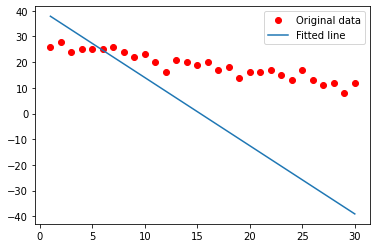

Testing... (Mean square loss Comparison)
Testing error= 17.44953
Absolute mean square loss difference: 334.6058


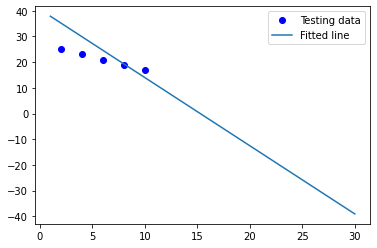

In [80]:
#Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % step == 0:
            c = sess.run(error, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
                "W=", sess.run(weight), "b=", sess.run(bias))

    print("Optimization Finished!")
    training_error = sess.run(error, feed_dict={X: train_X, Y: train_Y})
    print("Training error=", training_error, "W=", sess.run(weight), "b=", sess.run(bias), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(weight) * train_X + sess.run(bias), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested 
    test_X = np.asarray([2,4,6,8,10])
    test_Y = np.asarray([25,23,21,19,17])

    print("Testing... (Mean square loss Comparison)")
    testing_error = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing error=", testing_error)
    print("Absolute mean square loss difference:", abs(
        training_error - testing_error))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(weight) * train_X + sess.run(bias), label='Fitted line')
    plt.legend()
    plt.show()